In [20]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from fastai.imports import *
from fastai.tabular import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

ModuleNotFoundError: No module named 'pandas_summary'

In [4]:
PATH = "bulldozers/"

In [5]:
import os
os.listdir(PATH)

['Data Dictionary.xlsx',
 'Machine_Appendix.csv',
 'median_benchmark.csv',
 'random_forest_benchmark_test.csv',
 'Test.csv',
 'Train.7z',
 'Train.csv',
 'Train.zip',
 'TrainAndValid.7z',
 'TrainAndValid.csv',
 'TrainAndValid.zip',
 'Valid.7z',
 'Valid.csv',
 'Valid.zip',
 'ValidSolution.csv']

In [5]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [8]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [10]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [11]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [12]:
train_cats(df_raw)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:

In [13]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [14]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand = df_raw.UsageBand.cat.codes

<b> Missing Values </b> We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [15]:
df_raw.shape,len(df_raw)

((401125, 65), 401125)

In [16]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [30]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

Pre-processing
In the future we can simply read it from this fast format.

In [4]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [15]:
from structured import *

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [16]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [17]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

D:\ML\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830894636670713

In [18]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [31]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = ["train : ",rmse(m.predict(X_train), y_train),"valid :", rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid), "oob : "]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [20]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

D:\ML\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 42.2 s
['train', 0.0904436229776381, 'valid', 0.24823895439724264, 0.9829041488467857, 0.8899505590763521]


 r^2  = 1-(SSres/SStot)
 SSres = sum(Yact - Ypred)^2 
 SStot = sum(Yct - Yavg)^2 : How much the data varies wrt the average

In [22]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [23]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

D:\ML\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1.51 s
['train', 0.1132659020434026, 'valid', 0.37633735854173567, 0.9714777346162582, 0.7470686636189157]


In [49]:
### Single tree : n_estimators=1

In [37]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

['train : ', 0.5174022282819022, 'valid :', 0.5813502574674785, 0.4048283586121354, 0.39643546606278035, 'oob : ']


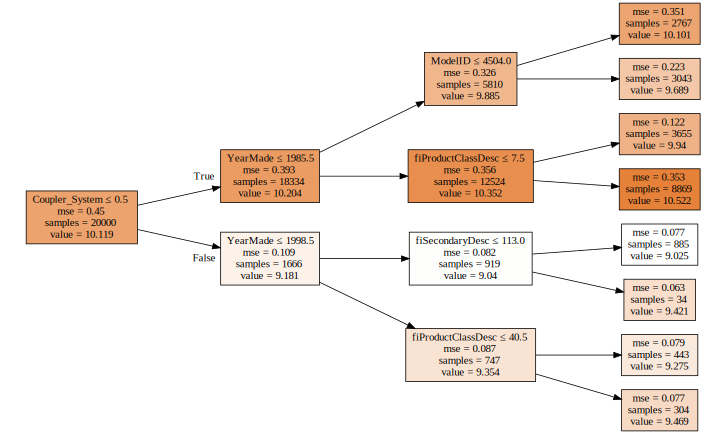

In [39]:
draw_tree(m.estimators_[0], df_trn, precision=3)

### Bagging

In [26]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

D:\ML\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['train', 0.11162923995771126, 'valid', 0.36816904048006566, 0.9722960575761478, 0.7579291443402475]


In [27]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([ 9.51044, 10.23996, 10.23996,  9.3501 ,  9.07681,  9.39266,  9.21034,  9.21034,  9.25913,  9.39266]),
 9.488241097408245,
 9.104979856318357)

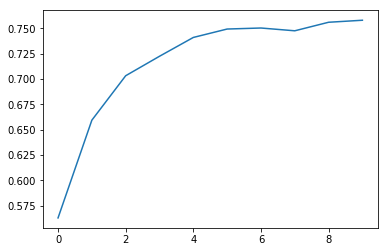

In [29]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

### Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [32]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

['train : ', 0.09706227575433242, 'valid :', 0.3586290522674331, 0.9790547002588288, 0.7703116801055235, 'oob : ', 0.8506226665139437]


##### Way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [33]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

['train : ', 0.13602355246289372, 'valid :', 0.3579838122078512, 0.9588647760353287, 0.7711374402103801, 'oob : ', 0.8524623851919823]


##### We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'
1, 3, 5, 10, 25, 100

In [40]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

['train : ', 0.14315746365068058, 'valid :', 0.35353609616590514, 0.9544368615764712, 0.7767890488806153, 'oob : ', 0.8547411040661983]


In [23]:
df_raw.shape[0],df_raw.shape[1]

(401125, 65)

In [38]:
df_raw.info().to_string()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   401125 non-null int8
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
state                       401125 non-null category
ProductGroup

AttributeError: 'NoneType' object has no attribute 'to_string'

In [5]:
import io
output = io.StringIO()
df_raw.info(buf=output)

In [6]:
df1 = pd.DataFrame(columns=['SalesID'], data=output.getvalue().split('\n'))

In [33]:
df_raw.describe().reset_index().to_dict('records')

[{'index': 'count',
  'SalesID': 401125.0,
  'SalePrice': 401125.0,
  'MachineID': 401125.0,
  'ModelID': 401125.0,
  'datasource': 401125.0,
  'auctioneerID': 380989.0,
  'YearMade': 401125.0,
  'MachineHoursCurrentMeter': 142765.0,
  'UsageBand': 401125.0,
  'saleYear': 401125.0,
  'saleMonth': 401125.0,
  'saleWeek': 401125.0,
  'saleDay': 401125.0,
  'saleDayofweek': 401125.0,
  'saleDayofyear': 401125.0,
  'saleElapsed': 401125.0},
 {'index': 'mean',
  'SalesID': 1919712.521503272,
  'SalePrice': 10.103096015678112,
  'MachineID': 1217902.5179707075,
  'ModelID': 6889.702980367716,
  'datasource': 134.66580990962916,
  'auctioneerID': 6.556039675686175,
  'YearMade': 1899.1569012153318,
  'MachineHoursCurrentMeter': 3457.955353202816,
  'UsageBand': -0.623897787472733,
  'saleYear': 2004.0957282642569,
  'saleMonth': 6.407035213462137,
  'saleWeek': 26.17986413212839,
  'saleDay': 16.110401994390777,
  'saleDayofweek': 2.6009747584917418,
  'saleDayofyear': 179.97758055468992,
  '

In [28]:
df_raw.describe().to_dict('records')

[{'SalesID': 401125.0,
  'SalePrice': 401125.0,
  'MachineID': 401125.0,
  'ModelID': 401125.0,
  'datasource': 401125.0,
  'auctioneerID': 380989.0,
  'YearMade': 401125.0,
  'MachineHoursCurrentMeter': 142765.0,
  'UsageBand': 401125.0,
  'saleYear': 401125.0,
  'saleMonth': 401125.0,
  'saleWeek': 401125.0,
  'saleDay': 401125.0,
  'saleDayofweek': 401125.0,
  'saleDayofyear': 401125.0,
  'saleElapsed': 401125.0},
 {'SalesID': 1919712.521503272,
  'SalePrice': 10.103096015678112,
  'MachineID': 1217902.5179707075,
  'ModelID': 6889.702980367716,
  'datasource': 134.66580990962916,
  'auctioneerID': 6.556039675686175,
  'YearMade': 1899.1569012153318,
  'MachineHoursCurrentMeter': 3457.955353202816,
  'UsageBand': -0.623897787472733,
  'saleYear': 2004.0957282642569,
  'saleMonth': 6.407035213462137,
  'saleWeek': 26.17986413212839,
  'saleDay': 16.110401994390777,
  'saleDayofweek': 2.6009747584917418,
  'saleDayofyear': 179.97758055468992,
  'saleElapsed': 1091432833.9864132},
 {'S

In [19]:
val =  [ i for i in df1[2:].SalesID[2:]]
val

['SalePrice                   401125 non-null float64',
 'MachineID                   401125 non-null int64',
 'ModelID                     401125 non-null int64',
 'datasource                  401125 non-null int64',
 'auctioneerID                380989 non-null float64',
 'YearMade                    401125 non-null int64',
 'MachineHoursCurrentMeter    142765 non-null float64',
 'UsageBand                   401125 non-null int8',
 'fiModelDesc                 401125 non-null category',
 'fiBaseModel                 401125 non-null category',
 'fiSecondaryDesc             263934 non-null category',
 'fiModelSeries               56908 non-null category',
 'fiModelDescriptor           71919 non-null category',
 'ProductSize                 190350 non-null category',
 'fiProductClassDesc          401125 non-null category',
 'state                       401125 non-null category',
 'ProductGroup                401125 non-null category',
 'ProductGroupDesc            401125 non-null catego

In [35]:
import StringIO
output = StringIO.StringIO()
#Write df.info to a string buffer
df.info(buf=output)
#put the info back to a dataframe so you can use df.to_html()
df_info =  pd.DataFrame(columns=['DF INFO'], data=output.getvalue().split('\n'))
df_info.to_html()

NameError: name 'StringIO' is not defined

TypeError: 'method-wrapper' object is not subscriptable